In [2]:
%pip install "ultralytics<=8.3.40" supervision roboflow
%pip install urllib3==1.26.15 requests-toolbelt==0.10.1
%pip install roboflow

import ultralytics
ultralytics.checks()

from IPython.display import Image as IPyImage

from ultralytics import YOLO
from PIL import Image
import requests

import supervision as sv

from roboflow import Roboflow

import os

HOME = os.getcwd()

%cd {HOME}

Ultralytics YOLOv8.2.103  Python-3.9.19 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 31.3 GB RAM, 4.4/186.2 GB disk)
e:\Yolov11


In [3]:
HOME

'e:\\Yolov11'

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="Bd1xDZi1DNXjAv7z0brc")
project = rf.workspace("ceeri-dwft0").project("instance-lzpga")
version = project.version(3)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/home/home/Coding/CEERI_v1/Yolov11/datasets’: File exists
/home/home/Coding/CEERI_v1/Yolov11/datasets
loading Roboflow workspace...
loading Roboflow project...


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

e:\Yolov11


Traceback (most recent call last):
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\ROG\anaconda3\envs\gpu\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\cfg\__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\models\yolo\model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\engine\model.py", line 145, in __init__
    self._load(model, task=task)
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\engine\model.py", line 285, in _load
    self.model, self.ckpt = attemp

args.yaml				    MaskP_curve.png
BoxF1_curve.png				    MaskPR_curve.png
BoxP_curve.png				    MaskR_curve.png
BoxPR_curve.png				    results.csv
BoxR_curve.png				    results.png
confusion_matrix_normalized.png		    train_batch0.jpg
confusion_matrix.png			    train_batch1.jpg
events.out.tfevents.1738350053.ROG.12227.0  train_batch2.jpg
labels_correlogram.jpg			    val_batch0_labels.jpg
labels.jpg				    val_batch0_pred.jpg
MaskF1_curve.png			    weights


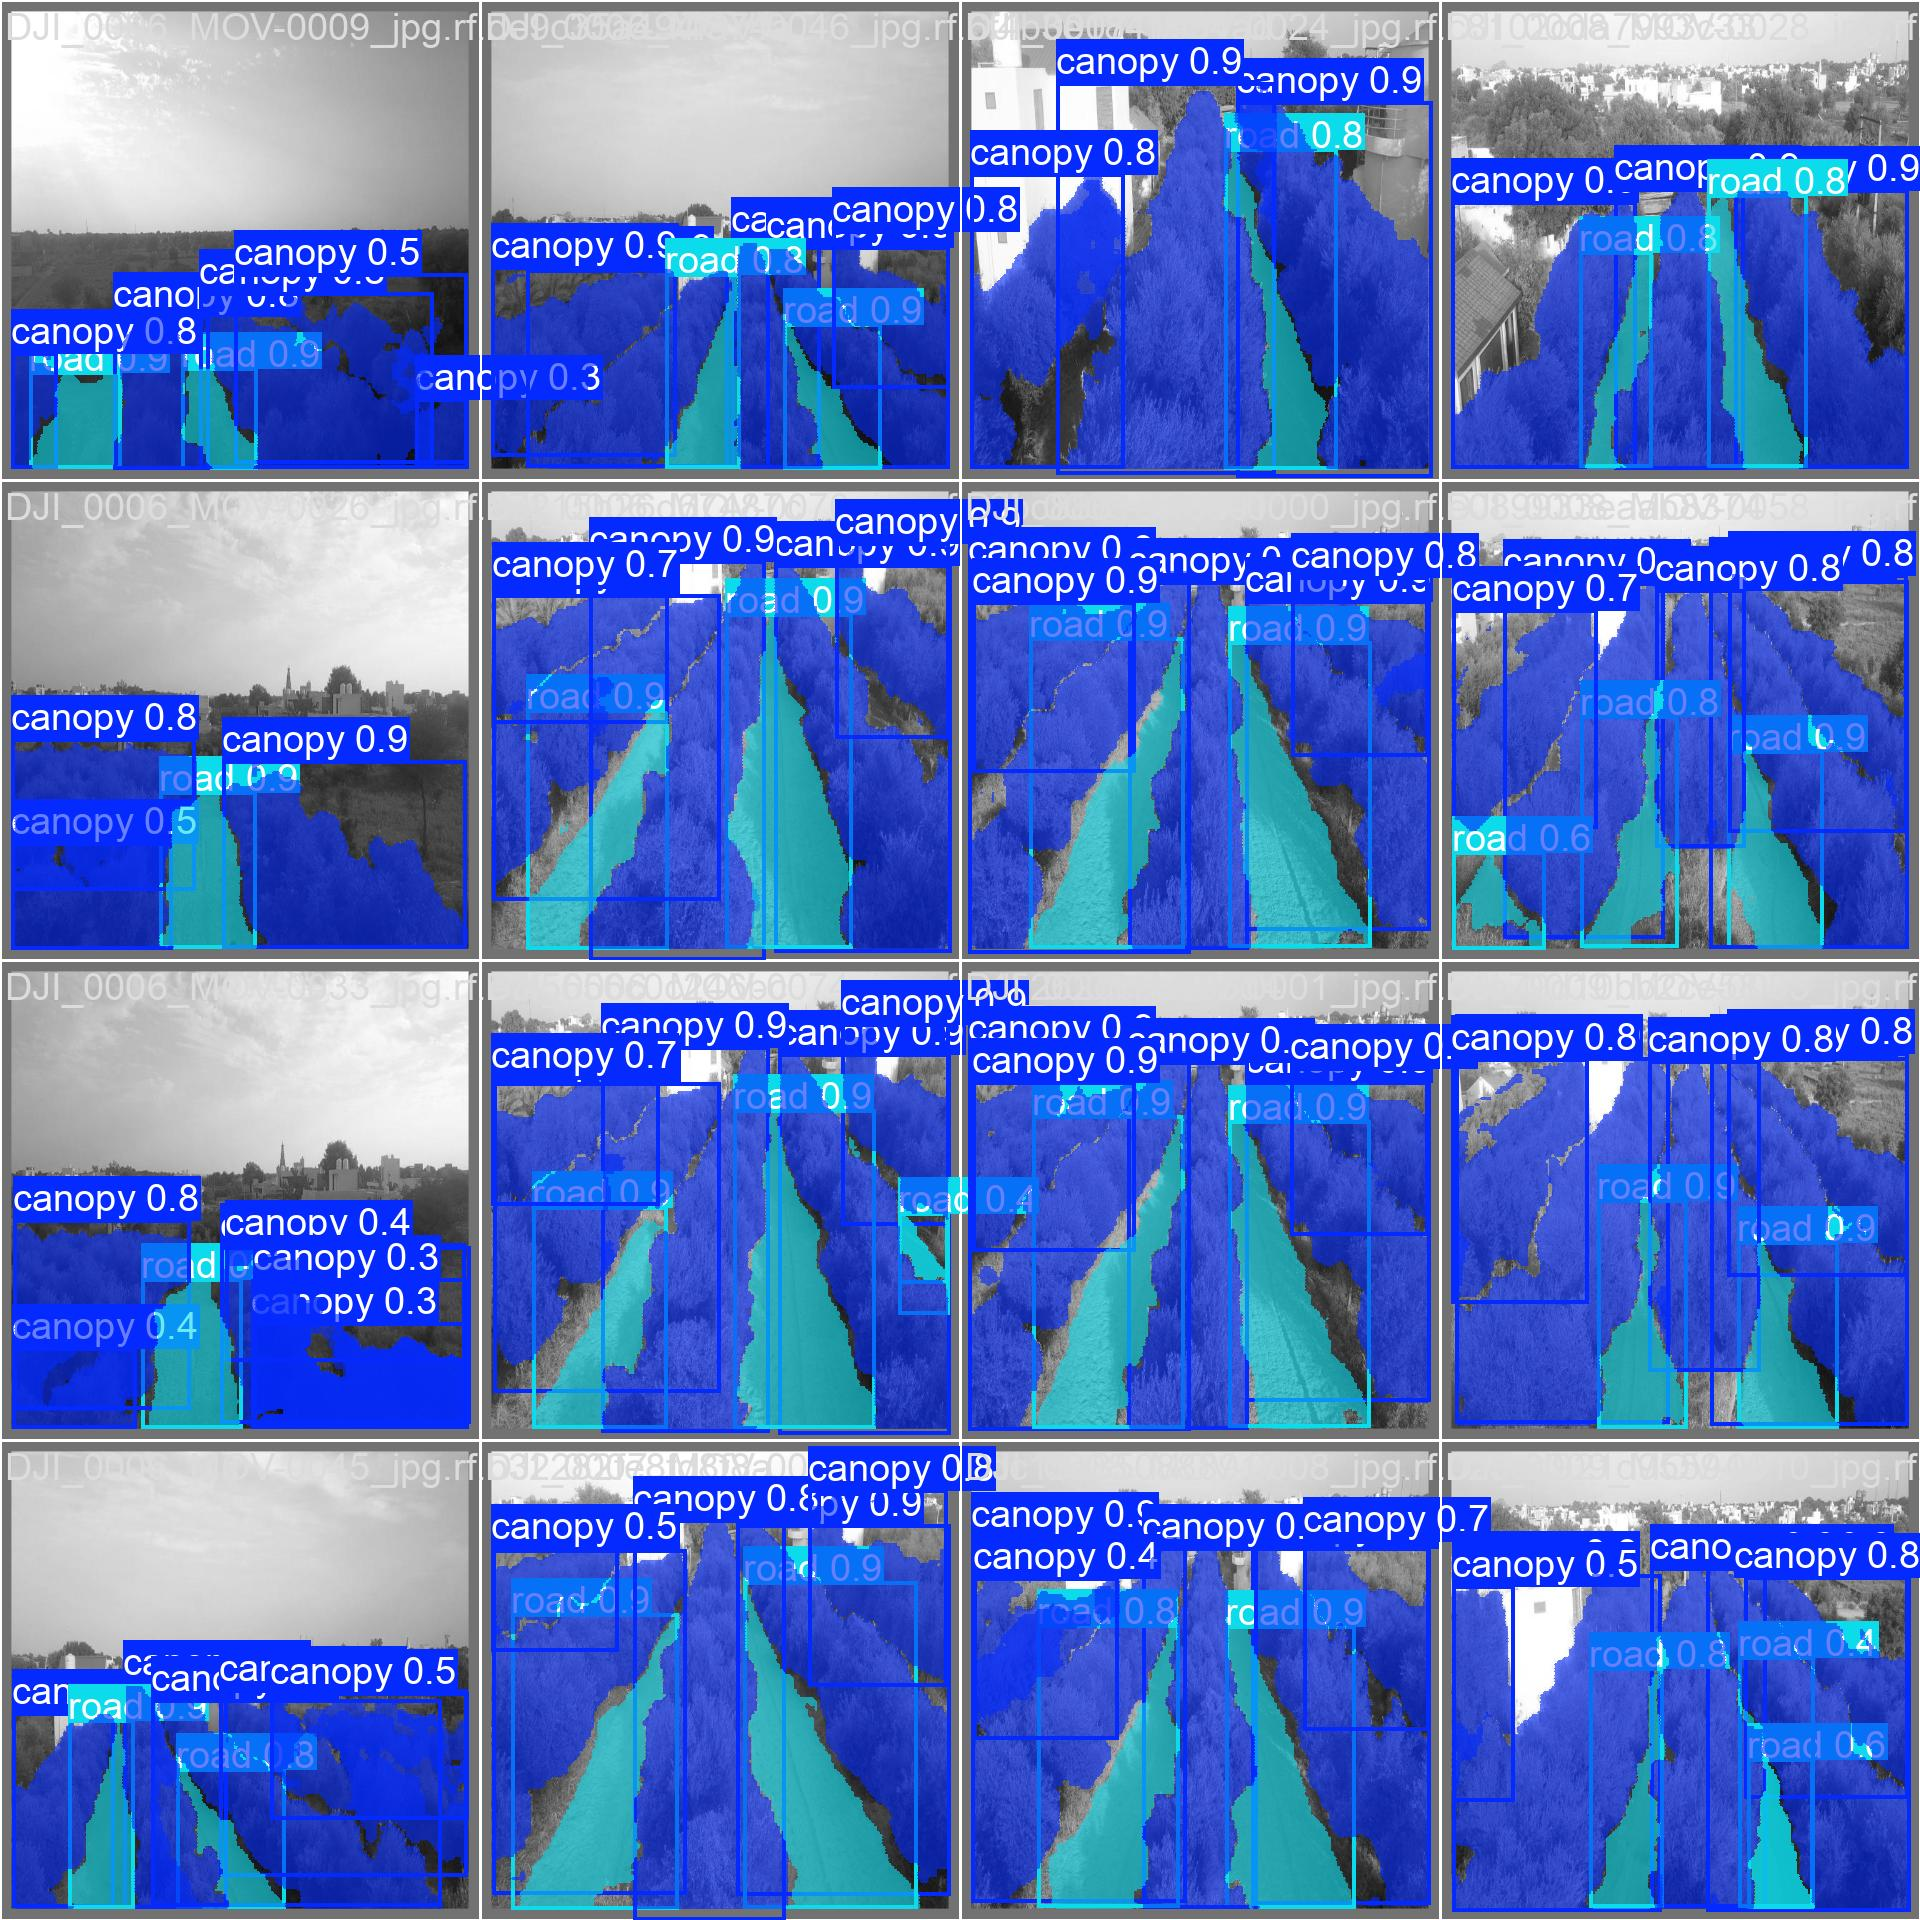

In [5]:
!ls {HOME}/runs/segment/train/

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)
IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)
IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [4]:
!yolo task=segment mode=val model=./runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Traceback (most recent call last):
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\ROG\anaconda3\envs\gpu\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\cfg\__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\models\yolo\model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\engine\model.py", line 145, in __init__
    self._load(model, task=task)
  File "C:\Users\ROG\anaconda3\envs\gpu\lib\site-packages\ultralytics\engine\model.py", line 285, in _load
    self.model, self.ckpt = attemp

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.15 source={HOME}/Dataset_Canopy save=True

/home/home/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
/home/home/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.0+cu118 CPU (AMD Ryzen 7 6800H with Rad

In [ ]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("canopy11s640.pt")

# TensorRT FP16
model.export(format="engine", imgsz=640, dynamic=True, batch=16, half=True, device="cuda:0")
